In [1]:
import pandas as pd
import sklearn
from sklearn.decomposition import PCA # faz o PCA
from sklearn import preprocessing # para centralizar os dados e manter a proporção entre as dimensões
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
color = ['blue', 'orange', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black', 'yellow', 'white']
label_c = 'Species'#coluna das classes
classes = True#dados tem classe ou none

df = pd.read_csv(r'Iris.csv')
df = df.drop(columns='Id')
df = df.dropna().reset_index(drop=True)
columns = df.columns
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
if classes != None:
    y = df[label_c]
    classes = set(y)
    classes = list(classes)
    X = df.drop(columns=label_c)
else:
    X = df
    classes=None
scaled_data = sklearn.preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

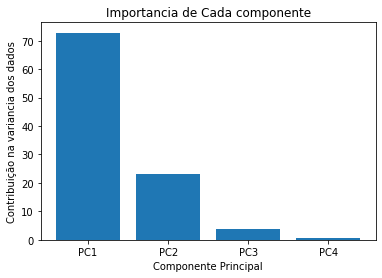

In [4]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)#quanta imformação cada pc tem em %, o ultimo é zero pq ne (não sei pq ele entra)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]# labels para o grafico

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)#grafico de barras
plt.ylabel('Contribuição na variancia dos dados')
plt.xlabel('Componente Principal')
plt.title('Importancia de Cada componente')
plt.show()

In [5]:
df = pd.DataFrame(pca_data, columns = labels)
df = pd.concat([df, y], axis = 1)
df

,PC1,PC2,PC3,PC4,Species
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa
...,...,...,...,...,...
145,1.870522,0.382822,0.254532,-0.388890,Iris-virginica
146,1.558492,-0.905314,-0.025382,-0.221322,Iris-virginica
147,1.520845,0.266795,0.179277,-0.118903,Iris-virginica
148,1.376391,1.016362,0.931405,-0.024146,Iris-virginica


In blue the Iris-setosa samples
In orange the Iris-versicolor samples
In green the Iris-virginica samples


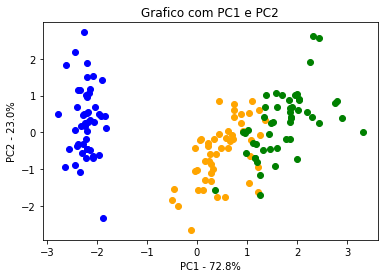

In [6]:
#Grafico com PC1 e PC2
df = df[['PC1','PC2','PC3','Species']]
if classes != None:
    for i in range(len(classes)):# cada iteração printa um a cor
        aux = df.loc[df[label_c] == classes[i]]
        print('In {} the {} samples'.format(color[i], classes[i]))
        plt.scatter(aux.PC1, aux.PC2, color = color[i]) # color   
else:
    aux = df.loc[df[label_c] == classes[i]]
    plt.scatter(aux.PC1, aux.PC2, color = color[rd.randrange(1, 10)]) # color

plt.title('Grafico com PC1 e PC2')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()

In blue the Iris-setosa samples
In orange the Iris-versicolor samples
In green the Iris-virginica samples


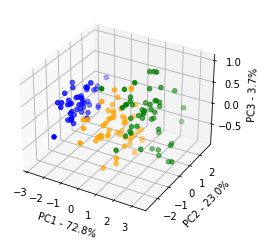

In [7]:
#Agora com PC1, PC2 e PC3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var[2]))

if classes != None:
    for i in range(len(classes)):# cada iteração printa um a cor
        
        aux = df.loc[df[label_c] == classes[i]]
        
        print('In {} the {} samples'.format(color[i], classes[i]))
        ax.scatter(aux.PC1, aux.PC2, aux.PC3, color = color[i]) # OBS: Em geral a escala de PC3 é bem menor que a dos outros eixos      
else:
    aux = df.loc[df[label_c] == classes[i]]
    ax.scatter(aux.PC1, aux.PC2, aux.PC3,color = color[rd.randrange(1, 10)]) # OBS: Em geral a escala de PC3 é bem menor que a dos outros eixos

In [8]:
columns = list(columns)
columns.remove(label_c)

In [9]:
aux = pd.Series(pca.components_[0], index=columns)
top_dimesoes = aux.abs().sort_values(ascending=False)
print(f'Top dimensions\n--------------\n{top_dimesoes}')

Top dimensions
--------------
PetalLengthCm    0.581254
PetalWidthCm     0.565611
SepalLengthCm    0.522372
SepalWidthCm     0.263355
dtype: float64
